In [1]:
## Import need packages 
from keras.wrappers.scikit_learn import KerasClassifier
import pandas as pd
import numpy as np
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization,Dropout

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization
import tensorflow as tf
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, GRU, Dense

from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix


In [2]:
dataset = pd.read_csv('../data/dataFrame.csv', index_col = False)
#dataset = pd.read_csv('../data/dataFrame.csv')

In [3]:
# dataset = pd.read_pickle("../data/dataset_df.pkl")

In [4]:
dataset

,Unnamed: 0,pname,key,summary,description,space,features,features_fixed,label
0,0,Books,BK-1,"In the Picture of Dorian Gray, do you think th...",NaN,,"In the Picture of Dorian Gray, do you think th...","in the picture of dorian gray, do you think th...",0
1,1,Books,BK-2,bb,NaN,,bb,bb,0
2,2,Books,BK-3,Need some advice from book experts,I got a lot of books at the moment and my book...,,Need some advice from book experts I got a lot...,need some advice from book experts i got a lot...,0
3,3,Books,BK-4,Can we talk about The Invisible Life Of Addie ...,I want to preface this with saying that *The I...,,Can we talk about The Invisible Life Of Addie ...,can we talk about the invisible life of addie ...,0
4,4,Books,BK-5,I Forgot a book and I want to read it again,NaN,,I Forgot a book and I want to read it again,i forgot a book and i want to read it again,0
...,...,...,...,...,...,...,...,...,...
49995,49995,Political Discussion,PD-9996,How has President Trump used Implicit and Expl...,NaN,,How has President Trump used Implicit and Expl...,how has president trump used implicit and expl...,4
49996,49996,Political Discussion,PD-9997,Is anyone else angry about how many people cou...,NaN,,Is anyone else angry about how many people cou...,is anyone else angry about how many people cou...,4
49997,49997,Political Discussion,PD-9998,To communist living in non communist countries...,NaN,,To communist living in non communist countries...,to communist living in non communist countries...,4
49998,49998,Political Discussion,PD-9999,Do you think politics have become less of civi...,NaN,,Do you think politics have become less of civi...,do you think politics have become less of civi...,4


In [5]:
dataset.head()

,Unnamed: 0,pname,key,summary,description,space,features,features_fixed,label
0,0,Books,BK-1,"In the Picture of Dorian Gray, do you think th...",NaN,,"In the Picture of Dorian Gray, do you think th...","in the picture of dorian gray, do you think th...",0
1,1,Books,BK-2,bb,NaN,,bb,bb,0
2,2,Books,BK-3,Need some advice from book experts,I got a lot of books at the moment and my book...,,Need some advice from book experts I got a lot...,need some advice from book experts i got a lot...,0
3,3,Books,BK-4,Can we talk about The Invisible Life Of Addie ...,I want to preface this with saying that *The I...,,Can we talk about The Invisible Life Of Addie ...,can we talk about the invisible life of addie ...,0
4,4,Books,BK-5,I Forgot a book and I want to read it again,NaN,,I Forgot a book and I want to read it again,i forgot a book and i want to read it again,0


In [6]:
X = dataset['features_fixed'].astype('str')
y = dataset['label']
y = tf.keras.utils.to_categorical(y) 

In [7]:
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=251)

In [9]:
# from keras.preprocessing.sequence import TimeseriesGenerator
# train_sequences = TimeseriesGenerator(x_train, y_train, length = 3)
# batch_x, batch_y = train_sequences[0]
# batch_x.shape
# test_sequences = TimeseriesGenerator(x_test, y_test, length = 3)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((37500,), (12500,), (37500, 5), (12500, 5))

In [11]:
# # using TfidfVectorizer and vectorizing both test and train data 
# tf_vect = TfidfVectorizer(stop_words='english', max_features=1000)
# X_train_trans = tf_vect.fit_transform(X_train)
# X_test_trans = tf_vect.transform(X_test)
# X_train_trans = X_train_trans.toarray()
# X_test_trans = X_test_trans.toarray()

In [12]:
tokenizer = Tokenizer(1000)
# tokenizer.fit_on_texts(X_train.iloc[:37500])
tokenizer.fit_on_texts(X_train)

x_train = tokenizer.texts_to_sequences(X_train)
x_test = tokenizer.texts_to_sequences(X_test)

x_train = pad_sequences(x_train, maxlen = 100)
x_test = pad_sequences(x_test, maxlen = 100)

In [13]:
x_train.shape

(37500, 100)

In [49]:
model = Sequential()

model.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
model.add(SimpleRNN(64))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',  metrics=['accuracy','Recall'])
# history = model.fit(train_sequences, validation_data=test_sequences, epochs = 30)
history = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs = 30)



Epoch 1/30
1172/1172 [==============================] - 18s 15ms/step - loss: 0.9959 - accuracy: 0.6107 - recall: 0.4454 - val_loss: 0.6534 - val_accuracy: 0.7627 - val_recall: 0.6909
Epoch 2/30
1172/1172 [==============================] - 17s 15ms/step - loss: 0.7191 - accuracy: 0.7401 - recall: 0.6633 - val_loss: 0.7871 - val_accuracy: 0.7088 - val_recall: 0.5968
Epoch 3/30
1172/1172 [==============================] - 17s 15ms/step - loss: 0.7903 - accuracy: 0.7067 - recall: 0.6039 - val_loss: 0.8519 - val_accuracy: 0.6735 - val_recall: 0.5612
Epoch 4/30
1172/1172 [==============================] - 17s 15ms/step - loss: 0.6963 - accuracy: 0.7438 - recall: 0.6596 - val_loss: 0.6061 - val_accuracy: 0.7770 - val_recall: 0.7012
Epoch 5/30
1172/1172 [==============================] - 17s 15ms/step - loss: 0.9090 - accuracy: 0.6520 - recall: 0.5124 - val_loss: 0.9754 - val_accuracy: 0.6178 - val_recall: 0.4510
Epoch 6/30
1172/1172 [==============================] - 17s 15ms/step - loss: 0.

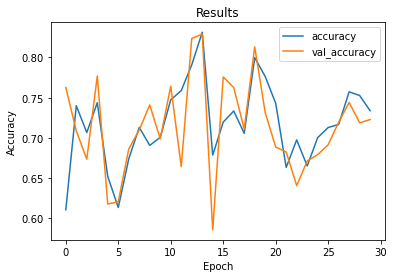

In [51]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results')
plt.legend()




Text(0.5, 1.0, 'Results')

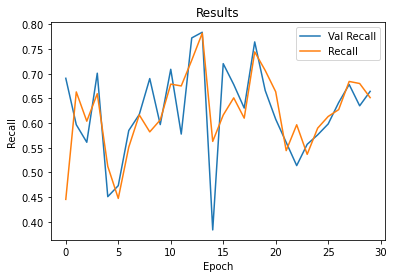

In [52]:
plt.plot(history.history['val_recall'], label='Val Recall')
plt.plot(history.history['recall'], label='Recall')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Results')



In [53]:
model = Sequential()

model.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))#creates embeddings


model.add(Conv1D(64, 10, activation = 'relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation = 'relu'))
model.add(GRU(32, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', metrics=['accuracy','Recall'], optimizer = 'adam')
# model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

# history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 10)

In [54]:
history = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs = 30)

Epoch 1/30
1172/1172 [==============================] - 17s 15ms/step - loss: 0.7984 - accuracy: 0.6663 - recall: 0.5190 - val_loss: 0.5430 - val_accuracy: 0.7857 - val_recall: 0.7171
Epoch 2/30
1172/1172 [==============================] - 17s 15ms/step - loss: 0.5172 - accuracy: 0.7967 - recall: 0.7230 - val_loss: 0.5036 - val_accuracy: 0.8041 - val_recall: 0.7276
Epoch 3/30
1172/1172 [==============================] - 17s 15ms/step - loss: 0.4726 - accuracy: 0.8158 - recall: 0.7484 - val_loss: 0.4992 - val_accuracy: 0.8077 - val_recall: 0.7469
Epoch 4/30
1172/1172 [==============================] - 17s 15ms/step - loss: 0.4412 - accuracy: 0.8287 - recall: 0.7674 - val_loss: 0.4996 - val_accuracy: 0.8083 - val_recall: 0.7511
Epoch 5/30
1172/1172 [==============================] - 17s 15ms/step - loss: 0.4045 - accuracy: 0.8444 - recall: 0.7873 - val_loss: 0.5152 - val_accuracy: 0.8070 - val_recall: 0.7475
Epoch 6/30
1172/1172 [==============================] - 17s 15ms/step - loss: 0.

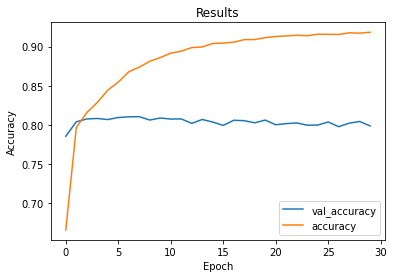

In [57]:
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results')
plt.legend()



Text(0.5, 1.0, 'Results')

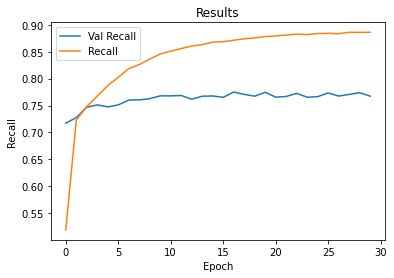

In [58]:
plt.plot(history.history['val_recall'], label='Val Recall')
plt.plot(history.history['recall'], label='Recall')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Results')

In [ ]:
# model = Sequential()

# model.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))#creates embeddings

# model.add(BatchNormalization())
# model.add(GRU(16, return_sequences = True))
# model.add(GRU(16, return_sequences = True))
# model.add(GRU(16))
# model.add(Dense(20, activation = 'relu', kernel_regularizer = 'l2'))
# model.add(Dropout(0.5))

# model.add(Dense(5, activation = 'softmax'))

# model.compile(loss = 'categorical_crossentropy', metrics=['accuracy','Recall'], optimizer = 'adam')

# history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 10)
# val_accuracy: 0.8515 

In [ ]:
# model = Sequential()
# model.add(Dense(12, input_shape=(1000,), activation='relu'))
# model.add(BatchNormalization())
# model.add(Dense(128, activation='relu', kernel_regularizer = 'l2'))
# model.add(Dropout(0.5))
# model.add(Dense(5, activation='softmax')) # --> changed from sigmoid to softmax 
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy','Recall'])
# val_accuracy: 0.8488

In [18]:


model = Sequential()

model.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))#creates embeddings


model.add(GRU(16, return_sequences = True))
model.add(GRU(16, return_sequences = True))
model.add(GRU(16))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', metrics=['accuracy','Recall'], optimizer = 'adam')

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 10)
# val_accuracy: 0.8614
# 0.8541





Epoch 1/10
1172/1172 [==============================] - 91s 78ms/step - loss: 0.7626 - accuracy: 0.6977 - recall: 0.5678 - val_loss: 0.4628 - val_accuracy: 0.8333 - val_recall: 0.7829
Epoch 2/10
1172/1172 [==============================] - 89s 76ms/step - loss: 0.4287 - accuracy: 0.8425 - recall: 0.7952 - val_loss: 0.4172 - val_accuracy: 0.8492 - val_recall: 0.7928
Epoch 3/10
1172/1172 [==============================] - 89s 76ms/step - loss: 0.3900 - accuracy: 0.8562 - recall: 0.8111 - val_loss: 0.4035 - val_accuracy: 0.8529 - val_recall: 0.8038
Epoch 4/10
1172/1172 [==============================] - 89s 76ms/step - loss: 0.3709 - accuracy: 0.8644 - recall: 0.8208 - val_loss: 0.4020 - val_accuracy: 0.8522 - val_recall: 0.8107
Epoch 5/10
1172/1172 [==============================] - 88s 75ms/step - loss: 0.3564 - accuracy: 0.8691 - recall: 0.8267 - val_loss: 0.3951 - val_accuracy: 0.8536 - val_recall: 0.8184
Epoch 6/10
1172/1172 [==============================] - 89s 76ms/step - loss: 0.

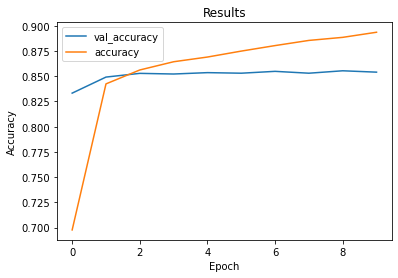

In [19]:
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results')
plt.legend()

Text(0.5, 1.0, 'Results')

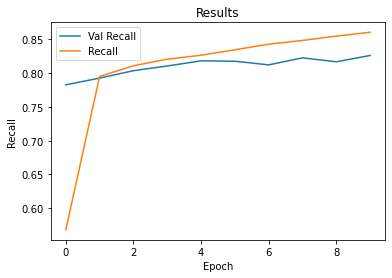

In [20]:
plt.plot(history.history['val_recall'], label='Val Recall')
plt.plot(history.history['recall'], label='Recall')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Results')

In [21]:
y_pred = model.predict(x_test)

In [80]:
y_pred

array([[1.31380381e-02, 3.08861403e-04, 6.30534370e-04, 9.84855950e-01,
        1.06658903e-03],
       [7.94039108e-04, 1.30470144e-05, 9.97837365e-01, 9.51406837e-05,
        1.26039668e-03],
       [9.60421681e-01, 1.52223010e-03, 1.22593786e-03, 3.48900147e-02,
        1.94018730e-03],
       ...,
       [1.21321832e-03, 2.83048557e-05, 1.34130838e-04, 9.97700274e-01,
        9.24077525e-04],
       [5.60430467e-01, 9.18409694e-03, 7.33641395e-03, 4.08154935e-01,
        1.48940515e-02],
       [1.55717798e-03, 4.94696433e-05, 3.49814974e-04, 9.97625172e-01,
        4.18345211e-04]], dtype=float32)

In [67]:
# df['label'] = dataset['pname'].map({'Books' : 0,
#                                         'Cooking' : 1,
#                                         'Machine Learning' : 2,
#                                         'Movies' : 3,
#                                         'Political Discussion' :4})

In [22]:
predIdxs = np.argmax(y_pred, axis=1)

In [23]:
predIdxs

array([3, 2, 0, ..., 3, 0, 3])

In [24]:
testIdxs = np.argmax(y_test, axis=1) 
testIdxs

array([3, 2, 3, ..., 3, 0, 3])

In [45]:
#con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()
conf_mat = confusion_matrix(testIdxs, predIdxs)
conf_mat

array([[1881,   29,   75,  365,  129],
       [  27, 2345,   26,   59,   24],
       [  74,   10, 2134,  111,  109],
       [ 114,   27,   43, 2167,  177],
       [  78,   17,   38,  292, 2149]])

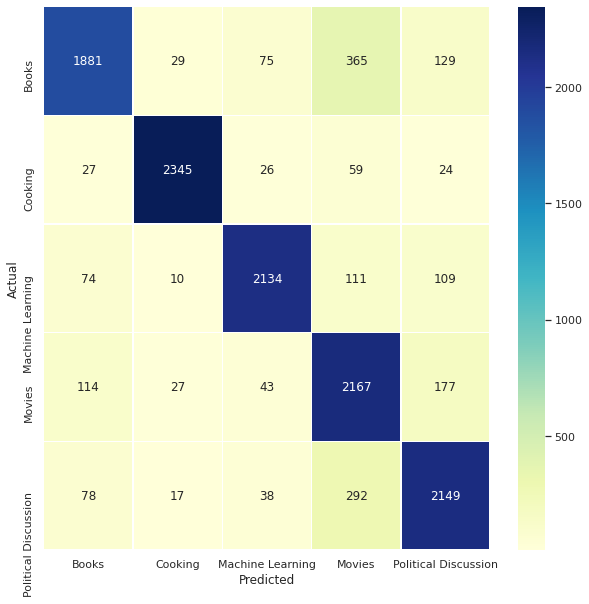

In [60]:
fig, ax = plt.subplots(figsize=(10,10))
sns.set_theme()
sns.color_palette("cubehelix", as_cmap=True)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="YlGnBu", 
            linecolor='white', linewidths=.5, xticklabels=dataset['pname'].unique(), 
            yticklabels=dataset['pname'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [88]:
# # Aid from: https://stackoverflow.com/questions/51282098/plotting-confusion-matrix-for-an-image-classification-model
# plt.style.use("ggplot")
# plt.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
# plt.xlabel("Predicted labels")
# plt.ylabel("True labels")
# plt.xticks(np.arange(len(cm)), ['Worn Incorrectly', 'With Mask', 'Without Mask'], rotation=45, size='large')
# plt.yticks(np.arange(len(cm)), ['Worn Incorrectly', 'With Mask', 'Without Mask'], rotation=45, size='large')
# plt.title('Confusion matrix ')
# plt.grid(None)
# plt.colorbar()
# for i in range(len(cm)):
#     for j in range(len(cm)):
#         plt.text(j, i, cm[i, j], ha='center', va='center', size='large')
# plt.show()

In [28]:
from sklearn import metrics
print(metrics.classification_report(testIdxs, predIdxs, target_names=dataset['pname'].unique()))

                      precision    recall  f1-score   support

               Books       0.87      0.76      0.81      2479
             Cooking       0.97      0.95      0.96      2481
    Machine Learning       0.92      0.88      0.90      2438
              Movies       0.72      0.86      0.78      2528
Political Discussion       0.83      0.83      0.83      2574

            accuracy                           0.85     12500
           macro avg       0.86      0.85      0.86     12500
        weighted avg       0.86      0.85      0.86     12500



In [26]:
dataset['pname'].unique()

array(['Books', 'Cooking', 'Machine Learning', 'Movies',
       'Political Discussion'], dtype=object)

In [29]:
model.save('my_model.h5')

In [30]:
new_model = tf.keras.models.load_model('my_model.h5')

In [31]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          64000     
_________________________________________________________________
gru (GRU)                    (None, None, 16)          3936      
_________________________________________________________________
gru_1 (GRU)                  (None, None, 16)          1632      
_________________________________________________________________
gru_2 (GRU)                  (None, 16)                1632      
_________________________________________________________________
dense (Dense)                (None, 20)                340       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 105       
Total params: 71,645
Trainable params: 71,645
Non-trainable params: 0
____________________________________________________

In [34]:
print(new_model.evaluate(x_test, y_test, verbose=2))
## print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

391/391 - 5s - loss: 0.4193 - accuracy: 0.8541 - recall: 0.8263
[0.41927024722099304, 0.8540800213813782, 0.8263199925422668]


In [50]:
tf.keras.utils.plot_model(new_model, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [ ]:
# model = keras.Sequential()
# # Add an Embedding layer expecting input vocab of size 1000, and
# # output embedding dimension of size 64.
# model.add(layers.Embedding(input_dim=1000, output_dim=64))

# # Add a LSTM layer with 128 internal units.
# model.add(layers.LSTM(128))

# # Add a Dense layer with 10 units.
# model.add(layers.Dense(10))

# model.summary()

In [28]:
model = Sequential()

model.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))#creates embeddings


model.add(GRU(16, return_sequences = True))
model.add(GRU(16, return_sequences = True))
model.add(GRU(16, return_sequences = True))
model.add(SimpleRNN(128, return_sequences = True))
model.add(LSTM(16))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', metrics=['accuracy','Recall'], optimizer = 'adam')

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 10)
# val_accuracy: 0.8566 

Epoch 1/10
1172/1172 [==============================] - 140s 119ms/step - loss: 1.2131 - accuracy: 0.4493 - recall: 0.1965 - val_loss: 0.9604 - val_accuracy: 0.6114 - val_recall: 0.3098
Epoch 2/10
1172/1172 [==============================] - 138s 118ms/step - loss: 0.7564 - accuracy: 0.7123 - recall: 0.5879 - val_loss: 0.5527 - val_accuracy: 0.7991 - val_recall: 0.7539
Epoch 3/10
1172/1172 [==============================] - 138s 117ms/step - loss: 0.5679 - accuracy: 0.7918 - recall: 0.7179 - val_loss: 0.5466 - val_accuracy: 0.7985 - val_recall: 0.7404
Epoch 4/10
1172/1172 [==============================] - 137s 117ms/step - loss: 0.5005 - accuracy: 0.8131 - recall: 0.7434 - val_loss: 0.5075 - val_accuracy: 0.8122 - val_recall: 0.7409
Epoch 5/10
1172/1172 [==============================] - 137s 117ms/step - loss: 0.4684 - accuracy: 0.8268 - recall: 0.7631 - val_loss: 0.4677 - val_accuracy: 0.8254 - val_recall: 0.7722
Epoch 6/10
1172/1172 [==============================] - 137s 117ms/ste

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
gru_6 (GRU)                  (None, None, 16)          3936      
_________________________________________________________________
gru_7 (GRU)                  (None, None, 16)          1632      
_________________________________________________________________
gru_8 (GRU)                  (None, None, 16)          1632      
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                340       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

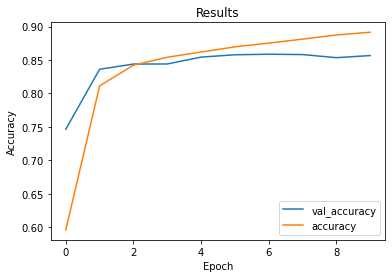

In [18]:
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results')
plt.legend()

Text(0.5, 1.0, 'Results')

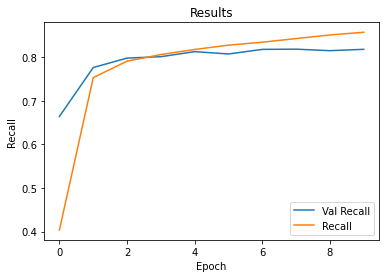

In [19]:
plt.plot(history.history['val_recall'], label='Val Recall')
plt.plot(history.history['recall'], label='Recall')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Results')

In [20]:
y_pred = model.predict(x_test)

In [22]:
predIdxs = np.argmax(y_pred, axis=1)
testIdxs = np.argmax(y_test, axis=1) 

In [23]:
conf_mat = confusion_matrix(testIdxs, predIdxs)
conf_mat

array([[2052,   26,   46,  210,  145],
       [  67, 2344,   10,   31,   29],
       [ 126,   17, 2124,   53,  118],
       [ 256,   20,   37, 1997,  218],
       [ 199,   11,   39,  134, 2191]])

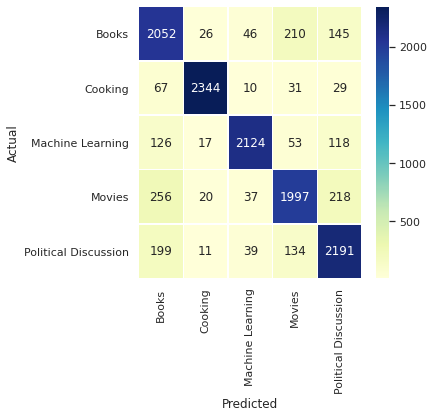

In [27]:
fig, ax = plt.subplots(figsize=(5,5))
sns.set_theme()
sns.color_palette("cubehelix", as_cmap=True)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="YlGnBu", 
            linecolor='white', linewidths=.5, xticklabels=dataset['pname'].unique(), 
            yticklabels=dataset['pname'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [25]:
from sklearn import metrics
print(metrics.classification_report(testIdxs, predIdxs, target_names=dataset['pname'].unique()))

                      precision    recall  f1-score   support

               Books       0.76      0.83      0.79      2479
             Cooking       0.97      0.94      0.96      2481
    Machine Learning       0.94      0.87      0.90      2438
              Movies       0.82      0.79      0.81      2528
Political Discussion       0.81      0.85      0.83      2574

            accuracy                           0.86     12500
           macro avg       0.86      0.86      0.86     12500
        weighted avg       0.86      0.86      0.86     12500

